## Random forest Regression

## Calculo de los modelos para las 5 competencias y el score principal, tunning de las variables y codigo para guardar los modelos

## 1. Instalar librerias

In [249]:
import pandas as pd
import numpy as np
import copy
import os
import glob

%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

import sklearn.metrics       as Metrics

import folium  #needed for interactive map
from folium.plugins import HeatMap

from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

%matplotlib inline
sns.set()


In [250]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Para Ejecutar en Google Drive

In [251]:
#from google.colab import drive
#drive.mount('/content/drive')

## 2. Leer bases

In [252]:
os.chdir('C:/Users/nohor/Documents/DS4A/Project/Data')
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#print(all_filenames)

In [253]:
dfModelo2019 = pd.read_csv('dfModelo2019.csv')
print (dfModelo2019.shape)

(148011, 123)


In [254]:
dfModelo2019.columns

Index(['Unnamed: 0', 'Saber11Preparation', 'Gender', 'HrsWorking',
       'TypeProgram', 'RootProgram', 'PaydScholarship', 'PaydCredit',
       'PaydParents', 'PaydYourself',
       ...
       'CitizenScore3yearsProgram', 'EnglishScore3yearsProgram',
       'ReadingScore3yearsProgram', 'QuantitativeReasoningScore3yearsProgram',
       'ComunicationScore3yearsProgram', 'CitizenScore3yearsUniversity',
       'EnglishScore3yearsUniversity', 'ReadingScore3yearsUniversity',
       'QuantitativeReasoningScore3yearsUniversity',
       'ComunicationScore3yearsUniversity'],
      dtype='object', length=123)

In [255]:
dfModelo2019a=dfModelo2019[[

                            'Saber11Preparation',
                            'Gender',
                            'HrsWorking',
                            'TypeProgram',
                            'PaydScholarship',
                            'PaydCredit',
                            'PaydParents',
                            'PaydYourself',
                            'MotherEducation',
                            'FatherEducation',
                            'SocialStrata',
                            'HaveVehicle',
                            'HaveComputer',
                            'HaveOvenGas',
                            'HaveInternet',
                            'HaveWasherMachine',
                            'HaveMoto',
                            'UniversityAcademicLevel',
                            'ZoneLive',
                            'ShareBathroom',
                            'MotherJob',
                            'FatherJob',
                            'CostUniversiteSemester',
                            'ScoreMathHighSchool',
                            'ScoreEnglishHighSchool',
                            'ScoreEnglishHighSchoolLevels',
                            'PositionScoreHighSchool',
                            'GenderHighSchool',
                            'HighSchoolType',
                            'HighSchoolCalendar',
                            'HighSchoolBilingual',
                            'HighSchoolTypeAcademic',
                            'HighSchoolSchedule',
                            'TimeExamvsS11',
                            'StudentWorks',
                            'StateLiveProgramSame',
                            'StateLiveExamSame',
                            'StateLiveHighSchoolSame',
                            'SocialStrataNumber',
                            'HomeNumberBath',
                            'Age',
                            'DistanceStateLiveProgram',
                            'ClusterProgram',
                            'ClusterUniversity',
                            'StateScore',
                            'ClusterState',

                            'CompetenceCitizen4Levels',
                            'CompetenceCitizenScore',
                            'CompetenceEnglish4Levels',
                            'CompetenceEnglishScore',
                            'CompetenceReading4Levels',
                            'CompetenceReadingScore',
                            'CompetenceQuantitativeReasoning4Levels',
                            'CompetenceQuantitativeReasoningScore',
                            #'CompetenceComunication4Levels',
                            'CompetenceComunicationScore',
                            'GlobalScorePercentile',
                            'GlobalScore',
    
                            'CitizenScore3yearsUniversity',
                            'EnglishScore3yearsUniversity',
                            'ReadingScore3yearsUniversity',
                            'QuantitativeReasoningScore3yearsUniversity',
                            'QuantitativeReasoningScore3yearsProgram',        
                            'EnglishScore3yearsProgram',
                            'CitizenScore3yearsProgram',
                            'ReadingScore3yearsProgram',
                            'EnglishScore3yearsUniversity',
                            'EnglishScore3yearsState',
                            'ComunicationScore3yearsProgram',
                            'ComunicationScore3yearsUniversity',
                            'ComunicationScore3yearsState',
    
                            'StateProgram', 'UniversityName', 'Program',
    
                            'Students'

    
    
                        
                            ]].dropna().copy()

                            
        #                   

In [256]:
dfModelo2019A1.shape

(112804, 74)

In [257]:
dfModelo2019a.head()

,Saber11Preparation,Gender,HrsWorking,TypeProgram,PaydScholarship,PaydCredit,PaydParents,PaydYourself,MotherEducation,FatherEducation,...,ReadingScore3yearsProgram,EnglishScore3yearsUniversity,EnglishScore3yearsState,ComunicationScore3yearsProgram,ComunicationScore3yearsUniversity,ComunicationScore3yearsState,StateProgram,UniversityName,Program,Students
2,Tomo un curso de preparacion,F,Entre 11 y 20 horas,PRESENCIAL,No,No,Si,No,4Profesional,2Bachiller,...,142.857461,137.431472,153.308858,147.136137,142.095052,150.437911,VALLE,CORPORACION UNIVERSITARIA CENTRO SUPERIOR UNI...,ADMINISTRACION DE EMPRESAS,1
3,No realizo ninguna prueba de preparacion,F,0,PRESENCIAL,No,No,Si,No,2Bachiller,2Bachiller,...,142.857461,137.431472,153.308858,147.136137,142.095052,150.437911,VALLE,CORPORACION UNIVERSITARIA CENTRO SUPERIOR UNI...,ADMINISTRACION DE EMPRESAS,1
4,Repaso por cuenta propia,F,Mas de 30 horas,PRESENCIAL,No,No,No,Si,1NoBachiller,1NoBachiller,...,142.857461,137.431472,153.308858,147.136137,142.095052,150.437911,VALLE,CORPORACION UNIVERSITARIA CENTRO SUPERIOR UNI...,ADMINISTRACION DE EMPRESAS,1
6,Tomo un curso de preparacion,F,Mas de 30 horas,PRESENCIAL,Si,Si,No,Si,1NoBachiller,2Bachiller,...,142.857461,137.431472,153.308858,147.136137,142.095052,150.437911,VALLE,CORPORACION UNIVERSITARIA CENTRO SUPERIOR UNI...,ADMINISTRACION DE EMPRESAS,1
7,Repaso por cuenta propia,M,Mas de 30 horas,PRESENCIAL,No,Si,Si,Si,1NoBachiller,Educacion profesional incompleta,...,142.857461,137.431472,153.308858,147.136137,142.095052,150.437911,VALLE,CORPORACION UNIVERSITARIA CENTRO SUPERIOR UNI...,ADMINISTRACION DE EMPRESAS,1


In [258]:
dfModelo2019a['ClusterUniversity'] = dfModelo2019a['ClusterUniversity'].astype('str')
dfModelo2019a['StudentWorks'] = dfModelo2019a['StudentWorks'].astype('str')
dfModelo2019a['StateLiveProgramSame'] = dfModelo2019a['StateLiveProgramSame'].astype('str')

dfModelo2019a['StateLiveExamSame'] = dfModelo2019a['StateLiveExamSame'].astype('str')
dfModelo2019a['StateLiveHighSchoolSame'] = dfModelo2019a['StateLiveHighSchoolSame'].astype('str')
dfModelo2019a['ClusterProgram'] = dfModelo2019a['ClusterProgram'].astype('str')
dfModelo2019a['ClusterState'] = dfModelo2019a['ClusterState'].astype('str')
dfModelo2019a['CompetenceCitizen4Levels'] = dfModelo2019a['CompetenceCitizen4Levels'].astype('str')
dfModelo2019a['CompetenceReading4Levels'] = dfModelo2019a['CompetenceReading4Levels'].astype('str')
dfModelo2019a['CompetenceQuantitativeReasoning4Levels'] = dfModelo2019a['CompetenceQuantitativeReasoning4Levels'].astype('str')
#dfModelo2019a['CompetenceComunication4Levels'] = dfModelo2019a['CompetenceComunication4Levels'].astype('str')


In [259]:
dfModelo2019a.groupby(dfModelo2019a['MotherEducation']).size()

MotherEducation
1NoBachiller    31616
2Bachiller      34668
3Tecnico        16586
4Profesional    17943
5Postgrado       9385
6NS-NR           2606
dtype: int64

In [260]:
dfModelo2019A1= dfModelo2019a.drop(columns =['StateProgram', 'UniversityName', 'Program']).copy()
dfModelo2019A1.shape

(112804, 71)

In [261]:
dfModelo2019b = pd.get_dummies(dfModelo2019A1).copy()
#dfModelo2019b = pd.get_dummies(dfModelo2019a,drop_first=True).copy()

In [262]:
dfModelo2019b.to_csv (r'C:\Users\nohor\Documents\DS4A\Project\data\dfModelo2019b.csv', header=True)

In [263]:
dfModelo2019a.to_csv (r'C:\Users\nohor\Documents\DS4A\Project\data\dfModelo2019a.csv', header=True)

## Random forest regressor

In [264]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

In [265]:
def evaluate(model, X_test, y_test):
    
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

#regressor.predict([[100, 100, 150, 22, 5, 1]])

In [266]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [267]:
dfModelo2019b.columns

Index(['ScoreMathHighSchool', 'ScoreEnglishHighSchool',
       'PositionScoreHighSchool', 'TimeExamvsS11', 'SocialStrataNumber', 'Age',
       'DistanceStateLiveProgram', 'StateScore', 'CompetenceCitizenScore',
       'CompetenceEnglishScore',
       ...
       'CompetenceEnglish4Levels_B1', 'CompetenceEnglish4Levels_B2',
       'CompetenceReading4Levels_1.0', 'CompetenceReading4Levels_2.0',
       'CompetenceReading4Levels_3.0', 'CompetenceReading4Levels_4.0',
       'CompetenceQuantitativeReasoning4Levels_1.0',
       'CompetenceQuantitativeReasoning4Levels_2.0',
       'CompetenceQuantitativeReasoning4Levels_3.0',
       'CompetenceQuantitativeReasoning4Levels_4.0'],
      dtype='object', length=218)

In [268]:
dfModelo2019b.head()

,ScoreMathHighSchool,ScoreEnglishHighSchool,PositionScoreHighSchool,TimeExamvsS11,SocialStrataNumber,Age,DistanceStateLiveProgram,StateScore,CompetenceCitizenScore,CompetenceEnglishScore,...,CompetenceEnglish4Levels_B1,CompetenceEnglish4Levels_B2,CompetenceReading4Levels_1.0,CompetenceReading4Levels_2.0,CompetenceReading4Levels_3.0,CompetenceReading4Levels_4.0,CompetenceQuantitativeReasoning4Levels_1.0,CompetenceQuantitativeReasoning4Levels_2.0,CompetenceQuantitativeReasoning4Levels_3.0,CompetenceQuantitativeReasoning4Levels_4.0
2,47.50,37.38,447.0,11.0,4.0,29.0,0.0,150.313314,112.0,132.0,...,0,0,1,0,0,0,1,0,0,0
3,22.00,43.00,694.0,6.0,2.0,22.0,0.0,150.313314,108.0,123.0,...,0,0,0,1,0,0,1,0,0,0
4,60.97,46.06,294.0,11.0,3.0,28.0,0.0,150.313314,132.0,144.0,...,0,0,1,0,0,0,1,0,0,0
6,42.74,44.34,698.0,10.0,3.0,28.0,0.0,150.313314,139.0,138.0,...,0,0,0,1,0,0,0,1,0,0
7,48.03,44.34,336.0,10.0,3.0,27.0,0.0,150.313314,146.0,156.0,...,0,0,0,1,0,0,0,1,0,0


In [269]:
dfModelo2019b.shape

(112804, 218)

### Modelo Base

In [333]:
XM1base=dfModelo2019b[[ 
                    #'PositionScoreHighSchool',
                    #'ScoreMathHighSchool',
                    #'QuantitativeReasoningScore3yearsProgram',
                    'Age',
                    #'TimeExamvsS11',
                    'Gender_M',
                    'DistanceStateLiveProgram',
                    'PaydScholarship_Si',
                    'PaydCredit_Si',
                    'PaydParents_Si',
                    'MotherEducation_1NoBachiller',
                    'MotherEducation_3Tecnico',
                    'MotherEducation_4Profesional',
                    'MotherEducation_5Postgrado',
                    'CostUniversiteSemester_1 Menos de 500 mil',
                    'CostUniversiteSemester_2 0.5M-4M',
                    'CostUniversiteSemester_3 4M-7M',
                    'CostUniversiteSemester_4 7+',
                    'CostUniversiteSemester_No pago matricula'
                    
                    
                    ]].copy()  # Features

yM1base=dfModelo2019a['CompetenceQuantitativeReasoningScore']  # Labels
np.random.seed(1337)
X_trainM1base, X_testM1base, y_trainM1base, y_testM1base = train_test_split(XM1base, yM1base, test_size=0.3)



In [334]:
X_testM1base.shape

(33842, 10)

In [335]:
regressorM1base = RandomForestRegressor(n_estimators = 20, random_state = 0) 
regressorM1base.fit(X_trainM1, y_trainM1) 
print('Accuracy Train')
AccuracyM1basetrain = evaluate(regressorM1base, X_trainM1, y_trainM1)
print('Accuracy Test')
AccuracyM1base = evaluate(regressorM1base, X_testM1, y_testM1)

Accuracy Train
Model Performance
Average Error: 6.2796 degrees.
Accuracy = 95.52%.
Accuracy Test
Model Performance
Average Error: 16.3490 degrees.
Accuracy = 88.28%.


### Modelo Razonamiento Cuantitativo

In [273]:
XM1=dfModelo2019b[[ 
                    'PositionScoreHighSchool',
                    'ScoreMathHighSchool',
                    'QuantitativeReasoningScore3yearsProgram',
                    'Age',
                    'TimeExamvsS11',
                    'Gender_M',
                    'DistanceStateLiveProgram',
                    'PaydScholarship_Si',
                    'PaydCredit_Si',
                    'PaydParents_Si',
                    'MotherEducation_1NoBachiller',
                    'MotherEducation_3Tecnico',
                    'MotherEducation_4Profesional',
                    'MotherEducation_5Postgrado',
                    'CostUniversiteSemester_1 Menos de 500 mil',
                    'CostUniversiteSemester_2 0.5M-4M',
                    'CostUniversiteSemester_3 4M-7M',
                   # 'CostUniversiteSemester_4 7+',
                    'CostUniversiteSemester_No pago matricula'
                    
                    
                    ]].copy()  # Features

yM1=dfModelo2019a['CompetenceQuantitativeReasoningScore']  # Labels
np.random.seed(1337)
X_trainM1, X_testM1, y_trainM1, y_testM1 = train_test_split(XM1, yM1, test_size=0.3)



In [274]:
X_testM1.shape

(33842, 18)

In [275]:
regressorM1 = RandomForestRegressor(n_estimators = 20, random_state = 0) 
regressorM1.fit(X_trainM1, y_trainM1) 
print('Accuracy Train')
AccuracyM1train = evaluate(regressorM1, X_trainM1, y_trainM1)
print('Accuracy Test')
AccuracyM1 = evaluate(regressorM1, X_testM1, y_testM1)

Accuracy Train
Model Performance
Average Error: 6.2796 degrees.
Accuracy = 95.52%.
Accuracy Test
Model Performance
Average Error: 16.3490 degrees.
Accuracy = 88.28%.


### Tunning modelo 1

In [276]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 40, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 22, 24, 26, 28, 31, 33, 35, 37, 40], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [277]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfM1 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomM1 = RandomizedSearchCV(estimator = rfM1, param_distributions = random_grid, n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_randomM1.fit(X_trainM1, y_trainM1)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [278]:
rf_randomM1.best_params_


{'n_estimators': 37,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [279]:

print('Accuracy Train')
AccuracyRFM1 = evaluate(rf_randomM1, X_trainM1, y_trainM1)
print('Accuracy Test')
AccuracyRFM1 = evaluate(rf_randomM1, X_testM1, y_testM1)

Accuracy Train
Model Performance
Average Error: 8.9190 degrees.
Accuracy = 93.61%.
Accuracy Test
Model Performance
Average Error: 15.8608 degrees.
Accuracy = 88.56%.


In [280]:
print('Improvement of {:0.2f}%.'.format( 100 * (AccuracyRFM1 - AccuracyM1) / AccuracyM1))

Improvement of 0.32%.


In [281]:
regressorM1 = RandomForestRegressor(n_estimators = 37, criterion='mse',max_depth=30,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',bootstrap=False, random_state = 0) 
regressorM1.fit(X_trainM1, y_trainM1) 
print('Accuracy Train')
AccuracyM1train = evaluate(regressorM1, X_trainM1, y_trainM1)
print('Accuracy Test')
AccuracyM1 = evaluate(regressorM1, X_testM1, y_testM1)

Accuracy Train
Model Performance
Average Error: 8.9500 degrees.
Accuracy = 93.58%.
Accuracy Test
Model Performance
Average Error: 15.9050 degrees.
Accuracy = 88.53%.


## Importance variables

In [282]:
feature_impM1 = pd.Series(regressorM1.feature_importances_, index=X_trainM1.columns).sort_values(ascending=False)
fiM1=feature_impM1.head(50)
fiM1

PositionScoreHighSchool                      0.355379
ScoreMathHighSchool                          0.242530
QuantitativeReasoningScore3yearsProgram      0.206151
Age                                          0.037741
Gender_M                                     0.029468
TimeExamvsS11                                0.024690
CostUniversiteSemester_2 0.5M-4M             0.023258
DistanceStateLiveProgram                     0.018201
PaydScholarship_Si                           0.009110
PaydCredit_Si                                0.008566
PaydParents_Si                               0.007817
MotherEducation_1NoBachiller                 0.007060
MotherEducation_3Tecnico                     0.006377
MotherEducation_4Profesional                 0.006344
MotherEducation_5Postgrado                   0.005913
CostUniversiteSemester_3 4M-7M               0.005141
CostUniversiteSemester_1 Menos de 500 mil    0.004547
CostUniversiteSemester_No pago matricula     0.001709
dtype: float64

No handles with labels found to put in legend.


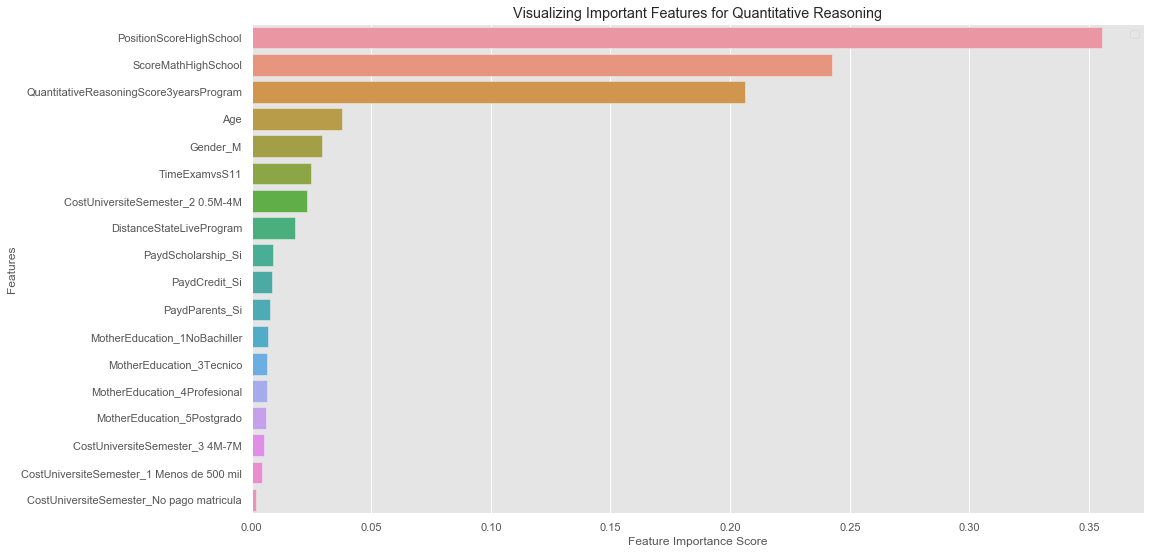

In [283]:
# Creating a bar plot
sns.barplot(x=fiM1, y=fiM1.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Quantitative Reasoning")
plt.legend()
plt.show()

### Modelo English

In [284]:
XM2=dfModelo2019b[[ 
                    'PositionScoreHighSchool',
                    'ScoreEnglishHighSchool',
                    'EnglishScore3yearsProgram',
                    'Age',
                    'TimeExamvsS11',
                    'Gender_M',
                    'DistanceStateLiveProgram',
                    'PaydScholarship_Si',
                    'PaydCredit_Si',
                    'PaydParents_Si',
                    'MotherEducation_1NoBachiller',
                    'MotherEducation_3Tecnico',
                    'MotherEducation_4Profesional',
                    'MotherEducation_5Postgrado',
                    'ClusterState_1.0',
                    'ClusterState_2.0',
                    'ClusterState_3.0',
                    'ClusterState_4.0'
                    
                    #'CostUniversiteSemester_1 Menos de 500 mil',
                    #'CostUniversiteSemester_2 0.5M-4M',
                   # 'CostUniversiteSemester_3 4M-7M',
                   # 'CostUniversiteSemester_4 7+',
                    #'CostUniversiteSemester_No pago matricula'
                    
                    ]].copy()  # Features

yM2=dfModelo2019a['CompetenceEnglishScore']  # Labels
np.random.seed(1337)
X_trainM2, X_testM2, y_trainM2, y_testM2 = train_test_split(XM2, yM2, test_size=0.3)



In [285]:
regressorM2 = RandomForestRegressor(n_estimators = 20, random_state = 0) 
regressorM2.fit(X_trainM2, y_trainM2) 
print('Accuracy Train')
AccuracyM2train = evaluate(regressorM2, X_trainM2, y_trainM2)
print('Accuracy Test')
AccuracyM2 = evaluate(regressorM2, X_testM2, y_testM2)


Accuracy Train
Model Performance
Average Error: 5.2111 degrees.
Accuracy = 96.49%.
Accuracy Test
Model Performance
Average Error: 13.5176 degrees.
Accuracy = 90.93%.


In [286]:
AccuracyM2train = evaluate(regressorM2, X_trainM2, y_trainM2)

Model Performance
Average Error: 5.2111 degrees.
Accuracy = 96.49%.


In [287]:
yM2.head()

2    132.0
3    123.0
4    144.0
6    138.0
7    156.0
Name: CompetenceEnglishScore, dtype: float64

In [288]:
#Import Random Forest Model
yM2a=dfModelo2019a['CompetenceEnglish4Levels']  # Labels
np.random.seed(1337)
X_trainM2a, X_testM2a, y_trainM2a, y_testM2a = train_test_split(XM2, yM2a, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trainM2a,y_trainM2a)

y_predM2a=clf.predict(X_testM2a)
print("Accuracy:",metrics.accuracy_score(y_testM2a, y_predM2a))

Accuracy: 0.6488387211157733


In [289]:
feature_impM2 = pd.Series(regressorM2.feature_importances_, index=X_trainM2.columns).sort_values(ascending=False)
fiM2=feature_impM2.head(7)
fiM2

ScoreEnglishHighSchool       0.574439
PositionScoreHighSchool      0.161444
EnglishScore3yearsProgram    0.097065
Age                          0.037208
TimeExamvsS11                0.025466
DistanceStateLiveProgram     0.013452
Gender_M                     0.011489
dtype: float64

No handles with labels found to put in legend.


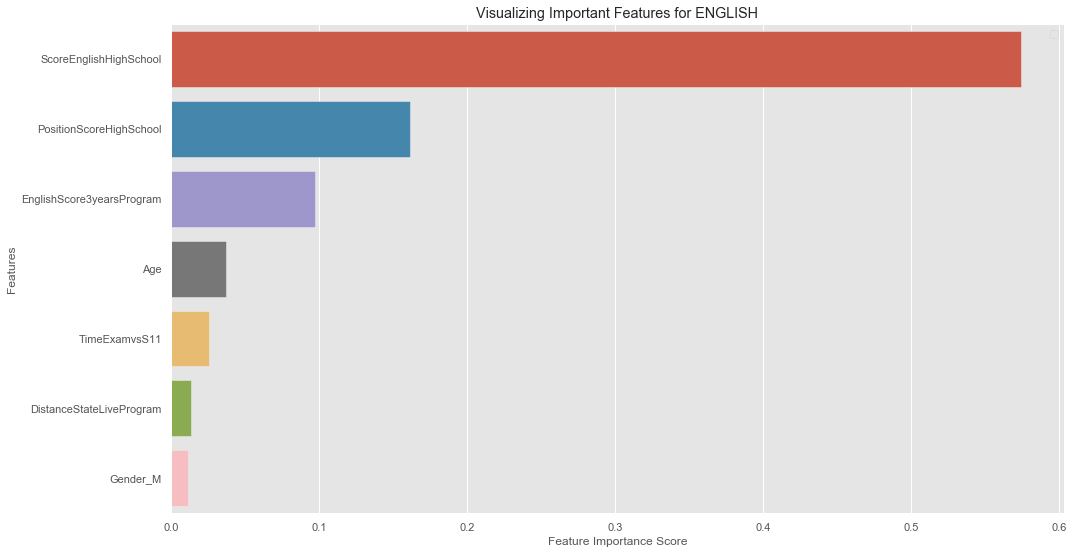

In [290]:
# Creating a bar plot
sns.barplot(x=fiM2, y=fiM2.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for ENGLISH")
plt.legend()
plt.show()

### Modelo Reading

In [336]:
XM3=dfModelo2019b[[ 
                    'PositionScoreHighSchool',
                    'ScoreMathHighSchool',
                    'ReadingScore3yearsProgram',
                    'Age',
                    'TimeExamvsS11',
                    'Gender_M',
                    #'HighSchoolBilingual_S',
                    'DistanceStateLiveProgram',
                    'PaydScholarship_Si',
                    'PaydCredit_Si',
                    'PaydParents_Si',
                    'MotherEducation_1NoBachiller',
                    'MotherEducation_3Tecnico',
                    'MotherEducation_4Profesional',
                    'MotherEducation_5Postgrado',
                    'CostUniversiteSemester_1 Menos de 500 mil',
                    'CostUniversiteSemester_2 0.5M-4M',
                   'CostUniversiteSemester_3 4M-7M',
                    'CostUniversiteSemester_No pago matricula'
                    
                    ]].copy()  # Features

yM3=dfModelo2019a['CompetenceReadingScore']  # Labels
np.random.seed(1337)
X_trainM3, X_testM3, y_trainM3, y_testM3 = train_test_split(XM3, yM3, test_size=0.3)



In [337]:
regressorM3 = RandomForestRegressor(n_estimators = 20, random_state = 0) 
regressorM3.fit(X_trainM3, y_trainM3) 
print('Accuracy Train')
AccuracyM3 = evaluate(regressorM3, X_testM3, y_testM3)
print('Accuracy Test')
AccuracyM3 = evaluate(regressorM3, X_testM3, y_testM3)


Accuracy Train
Model Performance
Average Error: 17.3624 degrees.
Accuracy = 87.78%.
Accuracy Test
Model Performance
Average Error: 17.3624 degrees.
Accuracy = 87.78%.


In [338]:
feature_impM3 = pd.Series(regressorM3.feature_importances_, index=X_trainM3.columns).sort_values(ascending=False)
fiM3=feature_impM3.head(7)
fiM3

PositionScoreHighSchool      0.546755
ReadingScore3yearsProgram    0.112633
ScoreMathHighSchool          0.101924
Age                          0.050452
TimeExamvsS11                0.028122
DistanceStateLiveProgram     0.020885
PaydCredit_Si                0.016278
dtype: float64

No handles with labels found to put in legend.


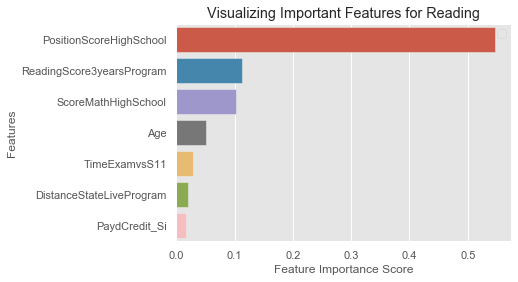

In [339]:
# Creating a bar plot
sns.barplot(x=fiM3, y=fiM3.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Reading")
plt.legend()
plt.show()

### Modelo Citizen

In [341]:
XM4=dfModelo2019b[[ 
                    'PositionScoreHighSchool',
                    'ScoreMathHighSchool',
                    'CitizenScore3yearsProgram',
                    'Age',
                    'TimeExamvsS11',
                    'Gender_M',
                    #'HighSchoolBilingual_S',
                    'DistanceStateLiveProgram',
                    'PaydScholarship_Si',
                    'PaydCredit_Si',
                    'PaydParents_Si',
                    'MotherEducation_1NoBachiller',
                    'MotherEducation_3Tecnico',
                    'MotherEducation_4Profesional',
                    'MotherEducation_5Postgrado',
    
                    'ClusterState_1.0',
                    'ClusterState_2.0',
                    'ClusterState_3.0',
                    'ClusterState_4.0',
    
                    'CostUniversiteSemester_1 Menos de 500 mil',
                    'CostUniversiteSemester_2 0.5M-4M',
                   #'CostUniversiteSemester_3 4M-7M',
                   'CostUniversiteSemester_4 7+',
                    'CostUniversiteSemester_No pago matricula'
                    
                    ]].copy()  # Features

yM4=dfModelo2019a['CompetenceCitizenScore']  # Labels
np.random.seed(1337)
X_trainM4, X_testM4, y_trainM4, y_testM4 = train_test_split(XM4, yM4, test_size=0.3)



In [342]:
regressorM4 = RandomForestRegressor(n_estimators = 20, random_state = 0) 
regressorM4.fit(X_trainM4, y_trainM4) 
print('Accuracy Train')
AccuracyM4 = evaluate(regressorM4, X_testM4, y_testM4)
print('Accuracy Test')
AccuracyM4 = evaluate(regressorM4, X_testM4, y_testM4)

Accuracy Train
Model Performance
Average Error: 19.7706 degrees.
Accuracy = 85.09%.
Accuracy Test
Model Performance
Average Error: 19.7706 degrees.
Accuracy = 85.09%.


In [343]:
feature_impM4 = pd.Series(regressorM4.feature_importances_, index=X_trainM4.columns).sort_values(ascending=False)
fiM4=feature_impM4.head(7)
fiM4

PositionScoreHighSchool      0.488396
CitizenScore3yearsProgram    0.130646
ScoreMathHighSchool          0.105289
Age                          0.051148
TimeExamvsS11                0.028259
DistanceStateLiveProgram     0.019892
PaydCredit_Si                0.016850
dtype: float64

No handles with labels found to put in legend.


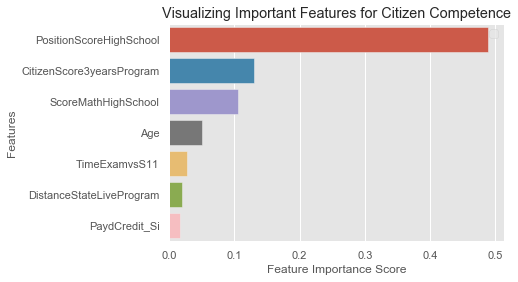

In [344]:
# Creating a bar plot
sns.barplot(x=fiM4, y=fiM4.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Citizen Competence")
plt.legend()
plt.show()

### Modelo Global Score

In [350]:
XM5=dfModelo2019b[[ 
                    'PositionScoreHighSchool',
                    'ScoreMathHighSchool',
                    'CitizenScore3yearsProgram',
                    'Age',
                    'TimeExamvsS11',
                    'Gender_M',
                    
                    'DistanceStateLiveProgram',
                    'PaydScholarship_Si',
                    'PaydCredit_Si',
                    'PaydParents_Si',
                    'MotherEducation_1NoBachiller',
                    'MotherEducation_3Tecnico',
                    'MotherEducation_4Profesional',
                    'MotherEducation_5Postgrado',
    
                    'ClusterState_1.0',
                    'ClusterState_2.0',
                    'ClusterState_3.0',
                    'ClusterState_4.0',
    
                    'CostUniversiteSemester_1 Menos de 500 mil',
                    'CostUniversiteSemester_2 0.5M-4M',
                   'CostUniversiteSemester_3 4M-7M',
                   
                    'CostUniversiteSemester_No pago matricula'
                    
                    ]].copy()  # Features

yM5=dfModelo2019a['GlobalScore']  # Labels
np.random.seed(1337)
X_trainM5, X_testM5, y_trainM5, y_testM5 = train_test_split(XM5, yM5, test_size=0.3)



In [351]:
regressorM5 = RandomForestRegressor(n_estimators = 20, random_state = 0) 
regressorM5.fit(X_trainM5, y_trainM5) 
print('Accuracy Train')
AccuracyM5 = evaluate(regressorM5, X_testM5, y_testM5)
print('Accuracy Test')
AccuracyM5 = evaluate(regressorM5, X_testM5, y_testM5)

Accuracy Train
Model Performance
Average Error: 10.1944 degrees.
Accuracy = 93.16%.
Accuracy Test
Model Performance
Average Error: 10.1944 degrees.
Accuracy = 93.16%.


In [352]:
feature_impM5 = pd.Series(regressorM5.feature_importances_, index=X_trainM5.columns).sort_values(ascending=False)
fiM5=feature_impM5.head(7)
fiM5

PositionScoreHighSchool      0.687297
CitizenScore3yearsProgram    0.072346
ScoreMathHighSchool          0.069753
Age                          0.035355
TimeExamvsS11                0.019644
DistanceStateLiveProgram     0.012178
Gender_M                     0.010484
dtype: float64

No handles with labels found to put in legend.


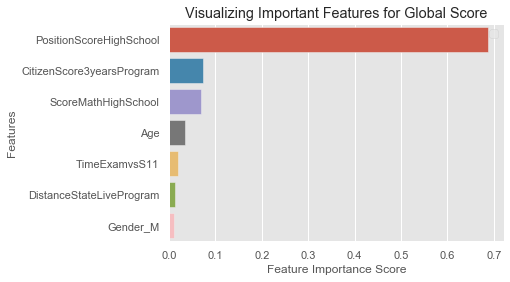

In [353]:
# Creating a bar plot
sns.barplot(x=fiM5, y=fiM5.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Global Score")
plt.legend()
plt.show()

### Modelo Comunication Score

In [356]:
XM6=dfModelo2019b[[ 
                    'PositionScoreHighSchool',
                    'ScoreMathHighSchool',
                    'ComunicationScore3yearsProgram',
                    'Age',
                    'TimeExamvsS11',
                    'Gender_M',
                    #'HighSchoolBilingual_S',
                    'DistanceStateLiveProgram',
                    'PaydScholarship_Si',
                    'PaydCredit_Si',
                    'PaydParents_Si',
                    'MotherEducation_1NoBachiller',
                    'MotherEducation_3Tecnico',
                    'MotherEducation_4Profesional',
                    'MotherEducation_5Postgrado',
    
                    'ClusterState_1.0',
                    'ClusterState_2.0',
                    'ClusterState_3.0',
                    'ClusterState_4.0'
                    
                    ]].copy()  # Features

yM6=dfModelo2019a['CompetenceComunicationScore']  # Labels
np.random.seed(1337)
X_trainM6, X_testM6, y_trainM6, y_testM6 = train_test_split(XM6, yM6, test_size=0.3)



In [357]:
regressorM6 = RandomForestRegressor(n_estimators = 20, random_state = 0) 
regressorM6.fit(X_trainM6, y_trainM6) 
print('Accuracy Train')
AccuracyM6 = evaluate(regressorM6, X_testM6, y_testM6)
print('Accuracy Test')
AccuracyM6 = evaluate(regressorM6, X_testM6, y_testM6)

Accuracy Train
Model Performance
Average Error: 20.7713 degrees.
Accuracy = 85.62%.
Accuracy Test
Model Performance
Average Error: 20.7713 degrees.
Accuracy = 85.62%.


In [358]:
feature_impM6 = pd.Series(regressorM6.feature_importances_, index=X_trainM6.columns).sort_values(ascending=False)
fiM6=feature_impM6.head(7)
fiM6

PositionScoreHighSchool           0.284755
ScoreMathHighSchool               0.171305
ComunicationScore3yearsProgram    0.170251
Age                               0.082793
TimeExamvsS11                     0.042455
DistanceStateLiveProgram          0.030610
PaydCredit_Si                     0.028452
dtype: float64

No handles with labels found to put in legend.


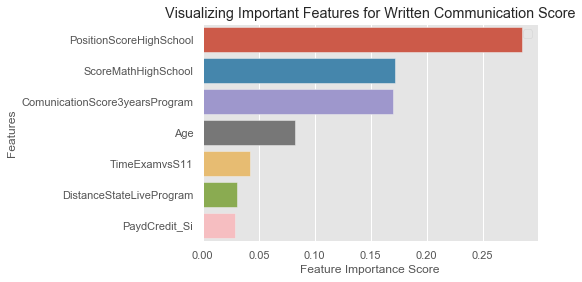

In [359]:
# Creating a bar plot
sns.barplot(x=fiM6, y=fiM6.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Written Communication Score")
plt.legend()
plt.show()

## GBM

In [307]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
#from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict
from xgboost import XGBClassifier
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import column_stack
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf
import statsmodels.api         as sm
import scipy

%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from io import StringIO
from IPython.display import Image, SVG
from graphviz import Source
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from scipy.stats import chi2_contingency, norm
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols
from sympy import var, plot_implicit, Eq

# ignore log(0) and divide by 0 warning
np.seterr(divide='ignore');

In [308]:
modelGBM = XGBRegressor()
modelGBM.fit(X_trainM1,y_trainM1)
print(modelGBM)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [309]:
AccuracyGBM = evaluate(modelGBM, X_testM1, y_testM1)

Model Performance
Average Error: 16.1972 degrees.
Accuracy = 88.29%.


In [310]:
score = modelGBM.score(X_trainM1,y_trainM1)  
print("Training scoreGBM: ", score)
score = modelGBM.score(X_testM1, y_testM1)  
print("Test scoreGBM: ", score)

Training scoreGBM:  0.6203342997383399
Test scoreGBM:  0.5724013178169052


In [311]:
score = regressorM1.score(X_trainM1,y_trainM1)  
print("Training score RF: ", score)

score = regressorM1.score(X_testM1, y_testM1)  
print("Test score RF: ", score)

Training score RF:  0.8654520003205459
Test score RF:  0.5803461671032568


## Exportar Base

In [312]:
ComparisonR = pd.DataFrame() 
y_predM1=regressorM1.predict(X_testM1)
y_predM2=regressorM2.predict(X_testM2)
y_predM3=regressorM3.predict(X_testM3)
y_predM4=regressorM4.predict(X_testM4)
y_predM5=regressorM5.predict(X_testM5)
y_predM6=regressorM6.predict(X_testM6)
y_predM1GBM=modelGBM.predict(X_testM1)

In [313]:
print(y_predM1.shape)
print(y_predM2.shape)
print(y_predM3.shape)

(33842,)
(33842,)
(33842,)


In [314]:
ComparisonR['y_testM1']=y_testM1
ComparisonR['y_predM1']=y_predM1

ComparisonR['y_testM2']=y_testM2
ComparisonR['y_predM2']=y_predM2

ComparisonR['y_testM3']=y_testM3
ComparisonR['y_predM3']=y_predM3

ComparisonR['y_testM4']=y_testM4
ComparisonR['y_predM4']=y_predM4

ComparisonR['y_testM5']=y_testM5
ComparisonR['y_predM5']=y_predM5

ComparisonR['y_testM6']=y_testM6
ComparisonR['y_predM6']=y_predM6

ComparisonR['y_predM1GBM']=y_predM1GBM

In [315]:
ComparisonR.head()

,y_testM1,y_predM1,y_testM2,y_predM2,y_testM3,y_predM3,y_testM4,y_predM4,y_testM5,y_predM5,y_testM6,y_predM6,y_predM1GBM
111237,153.0,144.717471,126.0,127.85,110.0,135.15,136.0,116.90,134.0,133.95,146.0,145.00,140.275558
114790,137.0,169.805706,158.0,146.90,151.0,148.80,163.0,156.75,149.0,149.90,134.0,134.85,168.306198
14357,204.0,169.034449,189.0,187.30,217.0,194.25,186.0,187.55,177.0,182.50,90.0,153.15,166.145325
136274,123.0,115.008845,150.0,124.65,133.0,129.70,101.0,126.85,130.0,136.25,142.0,149.90,116.961212
8490,168.0,146.529537,143.0,147.75,194.0,140.85,172.0,139.25,163.0,156.25,140.0,157.50,149.283127


In [316]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [323]:
BaseRF = pd.concat([ComparisonR, X_testM1], axis=1).dropna()
BaseRF.shape

(33842, 31)

In [324]:
dfModelo2019a.shape

(112804, 74)

In [325]:
BaseRF.head()

,y_testM1,y_predM1,y_testM2,y_predM2,y_testM3,y_predM3,y_testM4,y_predM4,y_testM5,y_predM5,...,PaydCredit_Si,PaydParents_Si,MotherEducation_1NoBachiller,MotherEducation_3Tecnico,MotherEducation_4Profesional,MotherEducation_5Postgrado,CostUniversiteSemester_1 Menos de 500 mil,CostUniversiteSemester_2 0.5M-4M,CostUniversiteSemester_3 4M-7M,CostUniversiteSemester_No pago matricula
111237,153.0,144.717471,126.0,127.85,110.0,135.15,136.0,116.90,134.0,133.95,...,0,0,1,0,0,0,0,1,0,0
114790,137.0,169.805706,158.0,146.90,151.0,148.80,163.0,156.75,149.0,149.90,...,1,1,1,0,0,0,0,0,1,0
14357,204.0,169.034449,189.0,187.30,217.0,194.25,186.0,187.55,177.0,182.50,...,0,0,0,0,0,0,0,1,0,0
136274,123.0,115.008845,150.0,124.65,133.0,129.70,101.0,126.85,130.0,136.25,...,0,1,0,0,0,0,0,1,0,0
8490,168.0,146.529537,143.0,147.75,194.0,140.85,172.0,139.25,163.0,156.25,...,0,0,0,0,1,0,1,0,0,0


In [326]:
BaseRF.to_csv (r'C:\Users\nohor\Documents\DS4A\Project\data\BaseRF.csv', header=True)

## Saving the Models

In [327]:
import joblib
#joblib.dump(rf, 'name.pkl', compress=9)
joblib.dump(regressorM1, 'ModelQR.pkl', compress=9) 

['ModelQR.pkl']

In [328]:
import joblib
#joblib.dump(rf, 'name.pkl', compress=9)
joblib.dump(regressorM2, 'ModelEN.pkl', compress=9) 

['ModelEN.pkl']

In [340]:
import joblib
#joblib.dump(rf, 'name.pkl', compress=9)
joblib.dump(regressorM3, 'ModelRE.pkl', compress=9) 

['ModelRE.pkl']

In [345]:
import joblib
#joblib.dump(rf, 'name.pkl', compress=9)
joblib.dump(regressorM4, 'ModelCI.pkl', compress=9) 

['ModelCI.pkl']

In [354]:
import joblib
#joblib.dump(rf, 'name.pkl', compress=9)
joblib.dump(regressorM5, 'ModelGLOBAL.pkl', compress=9) 

['ModelGLOBAL.pkl']

In [360]:
import joblib
#joblib.dump(rf, 'name.pkl', compress=9)
joblib.dump(regressorM6, 'ModelCOMMUNICATION.pkl', compress=9) 

['ModelCOMMUNICATION.pkl']